# Individual Planning Report  
#### github link: https://github.com/Yifan669/Project_individual_plan.git

## load package

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Import data

In [2]:
url = 'https://drive.google.com/uc?export=download&id=1CwjG1G1zX1CAuvYRNh7vd07ETVWACEiA'
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
url = 'https://drive.google.com/uc?export=download&id=1u8Vt1ThdXgK9nXPrEIQgSFcsGSitQHPI'
sessions <- read_csv(url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## Summarize Data(Players)

In [4]:
played_hours_summary <- players |>
  summarize(played_hours_mean = mean(played_hours, na.rm = TRUE),
            played_hours_min = min(played_hours, na.rm = TRUE),
            played_hours_max = max(played_hours, na.rm = TRUE),
            played_hours_sd = sd(played_hours, na.rm = TRUE))

age_summary <- players |>
  summarize(age_mean = mean(Age, na.rm = TRUE),
            age_min = min(Age, na.rm = TRUE),
            age_max = max(Age, na.rm = TRUE),
            age_sd = sd(Age, na.rm = TRUE))

played_hours_summary
age_summary

played_hours_mean,played_hours_min,played_hours_max,played_hours_sd
<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0,223.1,28.35734


age_mean,age_min,age_max,age_sd
<dbl>,<dbl>,<dbl>,<dbl>
21.13918,9,58,7.389687


In [5]:
experience_categories <- players |>
     distinct(experience)
experience_categories
gender_categories <- players |>
     distinct(gender)
gender_categories

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


## Data Description
Players dataset overview:
+ number of observations: 196
+ number of variables: 7  

The variables are:
+ `experience` is a character variable that records player's experience level in the game, such as `Pro`,`Veteran`, `Amateur`, `Regular`, and `Beginner`.
+ `subscribe` is a logical variable that indicates whether the players subscribed to a game-related newsletter, with `TRUE` meaning subscribed and `FALSE` meaning not subscribed.
+ `hashedEmail` is a character variable that records the uniquely hashed email addresses of players.
+ `played_hours` is a double variable that records the total number of hours each player has played on the MineCraft server. The mean `played_hours` is 5.85 hours, with a minimum of 0 and a maximum of 223.10.
+ `name` is a character variable that records the player's in-game name.
+ `gender` is a character variable that records the player’s reported gender, such as `Male`, `Female`, `Non-binary`, `Prefer not to say`, `Agender`, `Two-Spirited`, and `Other`.
+ `Age` is a double variable that records the player's age in years. The mean `Age` is 21.14, with a minimum of 9 and a maximum of 58.

### Potential Issues

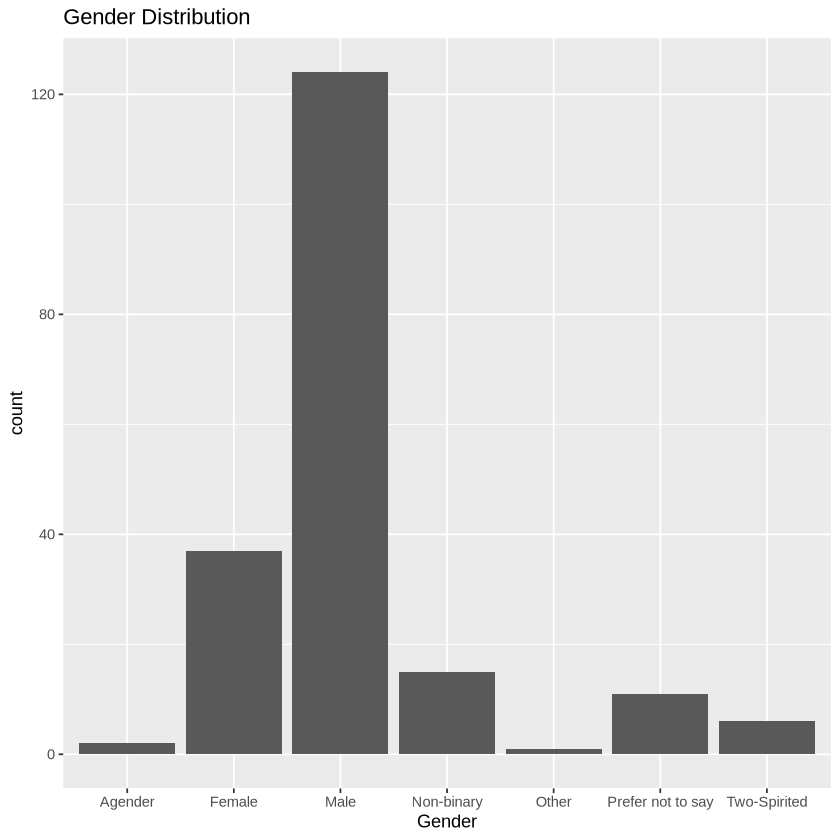

In [6]:
gender_distribution <- players |>
ggplot(aes(x = gender)) +
geom_bar() +
xlab("Gender") +
ggtitle("Gender Distribution")
gender_distribution

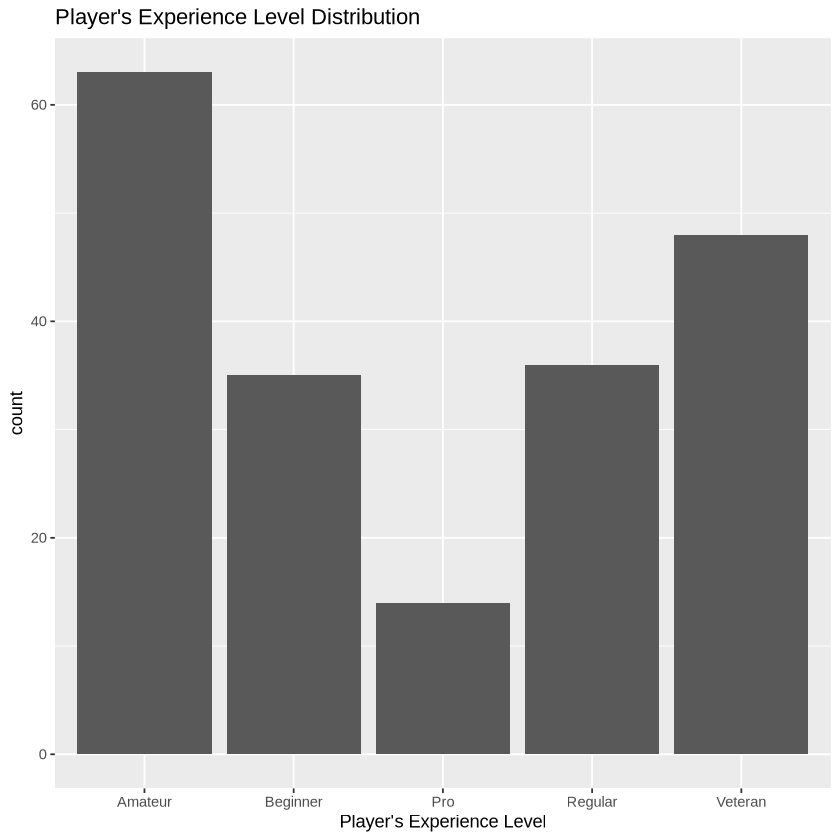

In [7]:
exp_distribution <- players |>
ggplot(aes(x = experience)) +
geom_bar() +
xlab("Player's Experience Level") +
ggtitle("Player's Experience Level Distribution")
exp_distribution

+ The minimum `played_hours` is 0. This may indicates inactive players or data recording errors.
+ The `hashedEmail` column is difficult to interpret and may provide meaningless information for analysis.
+ The `name` column may be useless for analysis.
+ Some categories in `experience` and `gender` may be underrepresented. In `gender`, the counts of `Agender`, `Other`, and `Two-Spirited` are very small compared to `Male` and `Female`. In `experience`, certain levels such as `Pro`, `Beginner`, and `Regular` have fewer observations than `Amateur`, and `Veteran`. This may affect predictive modeling because models may be biased toward majority classes.